In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col, count

In [2]:
spark = SparkSession.builder.master('local[*]').appName('used-car-price').config('spark.executor.memory', '6g').getOrCreate()

24/09/11 13:00:24 WARN Utils: Your hostname, langchain resolves to a loopback address: 127.0.1.1; using 192.168.0.103 instead (on interface wlp3s0)
24/09/11 13:00:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/09/11 13:00:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/09/11 13:00:25 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
spark = SparkSession.builder.master('local[*]').appName('used-car-price')\
.config("spark.executor.instances", "1")\
.config("spark.executor.memory", "6g")\
.config("spark.driver.memory", "6g")\
.config("spark.executor.memoryOverhead", "8g")\
.getOrCreate()

24/09/11 13:00:26 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [4]:
csv_file_path = '../data/train.csv'
df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

In [5]:
df.show()

+---+-------------+--------------------+----------+------+-------------+--------------------+--------------------+--------------------+-------+--------------------+-----------+-----+
| id|        brand|               model|model_year|milage|    fuel_type|              engine|        transmission|             ext_col|int_col|            accident|clean_title|price|
+---+-------------+--------------------+----------+------+-------------+--------------------+--------------------+--------------------+-------+--------------------+-----------+-----+
|  0|         MINI|       Cooper S Base|      2007|213000|     Gasoline|172.0HP 1.6L 4 Cy...|                 A/T|              Yellow|   Gray|       None reported|        Yes| 4200|
|  1|      Lincoln|               LS V8|      2002|143250|     Gasoline|252.0HP 3.9L 8 Cy...|                 A/T|              Silver|  Beige|At least 1 accide...|        Yes| 4999|
|  2|    Chevrolet|   Silverado 2500 LT|      2002|136731|E85 Flex Fuel|320.0HP 5.3L 

In [6]:
(training_data, validation_data) = df.randomSplit([0.8, 0.2], seed=42)

In [7]:
training_data

DataFrame[id: int, brand: string, model: string, model_year: int, milage: int, fuel_type: string, engine: string, transmission: string, ext_col: string, int_col: string, accident: string, clean_title: string, price: int]

In [8]:
validation_data

DataFrame[id: int, brand: string, model: string, model_year: int, milage: int, fuel_type: string, engine: string, transmission: string, ext_col: string, int_col: string, accident: string, clean_title: string, price: int]

In [9]:
model_counts = validation_data.groupBy('model').agg(count('model').alias('count')).orderBy('count')
model_counts.show(n=52)

+--------------------+-----+
|               model|count|
+--------------------+-----+
|  XT5 Premium Luxury|    1|
|             Model 3|    1|
|        GLS 450 Base|    1|
|   Corolla Hybrid LE|    1|
|Clubman Cooper S ...|    1|
|    CLS-Class CLS500|    1|
|         Revero Base|    1|
|    Encore Preferred|    1|
| Elantra HEV Limited|    1|
|              9-3 SE|    1|
|     RAV4 Hybrid XLE|    1|
|        X6 sDrive35i|    1|
|              750 iL|    1|
|            XJ8 Base|    1|
|        LYRIQ Luxury|    1|
|        X3 sDrive30i|    1|
|C-Class 4MATIC Sedan|    1|
|         ForTwo Pure|    1|
| C30 T5 Premier Plus|    1|
|          Niro EV EX|    1|
|             Rogue S|    1|
|        Charger SRT8|    1|
|      M-Class ML 350|    1|
| GLB 250 Base 4MATIC|    1|
|               XLR V|    1|
|         Model S 90D|    1|
|          Yaris Base|    1|
|            SX4 Base|    1|
|                 TLX|    1|
|Sienna XSE 25th A...|    1|
|          240SX Base|    1|
|            3

In [10]:
model_counts = training_data.groupBy('model').agg(count('model').alias('count')).orderBy('count')
model_counts.show(n=52)

+--------------------+-----+
|               model|count|
+--------------------+-----+
|            Forte LX|    1|
|             X5 3.0i|    1|
|Ascent Limited 7-...|    1|
|        X5 xDrive40e|    1|
|            XLR Base|    1|
|               XLR V|    1|
|Integra w/A-Spec ...|    1|
|         ForTwo Pure|    1|
|Niro Plug-In Hybr...|    2|
|     Maverick Lariat|    2|
|X5 xDrive 35i Spo...|    2|
|       AMG C 43 Base|    2|
|V60 T6 R-Design P...|    2|
|            X5 3.0si|    2|
|allroad 2.0T Pres...|    2|
|        X3 xDrive35i|    2|
|Convertible John ...|    2|
|IONIQ Plug-In Hyb...|    2|
|             i3 Base|    3|
|            3500 SLT|    3|
|     Carrera GT Base|    3|
|        X6 sDrive35i|    3|
|Sportage Plug-In ...|    3|
|  812 Superfast Base|    3|
|          Yaris Base|    3|
| X5 eDrive xDrive40e|    3|
|740e xDrive iPerf...|    3|
|500e Battery Elec...|    3|
|         LS 500 Base|    3|
|C-Class 4MATIC Sedan|    3|
|     Ram 1500 SRT-10|    3|
|          Sti

In [11]:
model_counts = training_data.groupBy('engine').agg(count('engine').alias('count')).orderBy('count')
model_counts.show(n=52)

+--------------------+-----+
|              engine|count|
+--------------------+-----+
|443.0HP 4.4L 8 Cy...|    1|
|111.0HP Electric ...|    1|
|184.0HP 2.4L 4 Cy...|    1|
|151.0HP 1.5L 4 Cy...|    1|
|141.0HP 2.0L 4 Cy...|    1|
|139.0HP 1.6L 4 Cy...|    1|
|78.0HP 1.2L 3 Cyl...|    1|
|313.0HP 2.0L 4 Cy...|    1|
|332.0HP 6.0L 8 Cy...|    2|
|321.0HP Electric ...|    2|
|178.0HP 1.8L 4 Cy...|    2|
|121.0HP 1.8L 4 Cy...|    2|
|325.0HP 3.0L Stra...|    2|
|226.0HP 1.6L 4 Cy...|    2|
|543.0HP 5.5L 12 C...|    2|
|322.0HP 2.0L 4 Cy...|    2|
|120.0HP 2.2L 4 Cy...|    2|
|212.0HP 1.5L 4 Cy...|    2|
|139.0HP 1.6L 4 Cy...|    2|
|3.8L V6 12V MPFI OHV|    2|
|250.0HP 2.7L V6 C...|    2|
|275.0HP 3.5L V6 C...|    3|
|300.0HP 1.6L 3 Cy...|    3|
|316.0HP 6.2L 8 Cy...|    3|
|192.0HP 2.0L 4 Cy...|    3|
|369.0HP 3.0L Stra...|    3|
|266.0HP 2.5L 4 Cy...|    3|
|450.0HP 4.5L 8 Cy...|    3|
|115.0HP Electric ...|    3|
|              120 AH|    3|
|280.0HP 2.8L V6 C...|    3|
|294.0HP 4.2L 

In [12]:
from pyspark.sql.functions import col, count

model_counts = training_data.groupBy("model").agg(count("model").alias("count"))

#
filtered_models = model_counts.filter(col("count") <= 3)
models_with_low_count = filtered_models.select("model").rdd.flatMap(lambda x: x).collect()

# Print the results
print(models_with_low_count)


['Niro Plug-In Hybrid EX', 'Forte LX', 'i3 Base', '3500 SLT', 'Carrera GT Base', 'X6 sDrive35i', 'Sportage Plug-In Hybrid X-Line', '812 Superfast Base', 'Yaris Base', 'X5 eDrive xDrive40e', 'Maverick Lariat', 'X5 3.0i', '740e xDrive iPerformance', 'X5 xDrive 35i Sport Activity', 'Ascent Limited 7-Passenger', '500e Battery Electric', 'AMG C 43 Base', 'V60 T6 R-Design Platinum', 'LS 500 Base', 'C-Class 4MATIC Sedan', 'Ram 1500 SRT-10', 'Stinger GT', 'X5 xDrive40e', 'Model 3 Standard Range', 'Mirage ES', 'X5 3.0si', 'allroad 2.0T Prestige', '370Z NISMO', 'XC60 3.2', 'Insight EX', 'Corvette ZR-1', 'XLR Base', 'XLR V', 'X3 xDrive35i', 'Convertible John Cooper Works', 'Integra w/A-Spec Tech Package', 'IONIQ Plug-In Hybrid SEL', 'ForTwo Pure']


In [13]:
engine_counts = training_data.groupBy("engine").agg(count("engine").alias("count"))
filtered_engine = engine_counts.filter(col("count") <= 3)
engine_with_low_count = filtered_engine.select("engine").rdd.flatMap(lambda x: x).collect()
print(engine_with_low_count)

['275.0HP 3.5L V6 Cylinder Engine Flex Fuel Capability', '316.0HP 6.2L 8 Cylinder Engine Flex Fuel Capability', '332.0HP 6.0L 8 Cylinder Engine Gas/Electric Hybrid', '321.0HP Electric Motor Electric Fuel System', '300.0HP 1.6L 3 Cylinder Engine Gasoline Fuel', '192.0HP 2.0L 4 Cylinder Engine Gas/Electric Hybrid', '369.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid', '266.0HP 2.5L 4 Cylinder Engine Plug-In Electric/Gas', '178.0HP 1.8L 4 Cylinder Engine Gasoline Fuel', '121.0HP 1.8L 4 Cylinder Engine Gas/Electric Hybrid', '325.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel', '226.0HP 1.6L 4 Cylinder Engine Gas/Electric Hybrid', '450.0HP 4.5L 8 Cylinder Engine Gasoline Fuel', '543.0HP 5.5L 12 Cylinder Engine Gasoline Fuel', '322.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas', '120.0HP 2.2L 4 Cylinder Engine Flex Fuel Capability', '443.0HP 4.4L 8 Cylinder Engine Gasoline Fuel', '212.0HP 1.5L 4 Cylinder Engine Plug-In Electric/Gas', '139.0HP 1.6L 4 Cylinder Engine Ga

In [14]:
engine_counts = training_data.groupBy('engine').agg(count('engine').alias('count'))
training_data = training_data.join(engine_counts, on='engine', how='left')
training_data = training_data.withColumn('engine', when(col('count') <= 3, 'Rare_engine').otherwise(col('engine')))
training_data = training_data.drop('count')

In [49]:
rare_features = engine_with_low_count

rare_features_set = set(rare_features)

validation_data = validation_data.withColumn(
    'engine',
    when(col('engine').isin(rare_features_set), 'Rare_engine').otherwise(col('engine'))
)

validation_data.show()


+---+-------------+--------------------+----------+------+--------------+--------------------+--------------------+--------------------+-------+--------------------+-----------+-----+
| id|        brand|               model|model_year|milage|     fuel_type|              engine|        transmission|             ext_col|int_col|            accident|clean_title|price|
+---+-------------+--------------------+----------+------+--------------+--------------------+--------------------+--------------------+-------+--------------------+-----------+-----+
|  2|    Chevrolet|   Silverado 2500 LT|      2002|136731| E85 Flex Fuel|320.0HP 5.3L 8 Cy...|                 A/T|                Blue|   Gray|       None reported|        Yes|13900|
|  6|         Audi|           A8 L 3.0T|      2016| 62200|      Gasoline|333.0HP 3.0L V6 C...|         8-Speed A/T|               Black|  Black|       None reported|        Yes|28500|
|  8|         Ford|           F-150 XLT|      2020| 38352|      Gasoline|2.7L V6

In [15]:
engine_counts = training_data.groupBy('engine').agg(count('engine').alias('count')).orderBy('count')
engine_counts.show(n=52)

+--------------------+-----+
|              engine|count|
+--------------------+-----+
|240.0HP 2.5L 4 Cy...|    4|
|           1.8 Liter|    4|
|3.0L V6 Cylinder ...|    4|
|260.0HP 3.0L Stra...|    4|
|294.0HP 4.2L 8 Cy...|    4|
|567.0HP 6.0L 12 C...|    4|
|4.4 Liter GDI DOH...|    4|
|174.0HP 1.5L 4 Cy...|    4|
|407.0HP 4.4L 8 Cy...|    4|
|164.0HP 1.4L 4 Cy...|    4|
|1.6L I4 16V GDI DOHC|    4|
|288.0HP 2.0L 4 Cy...|    4|
|253.0HP 3.5L V6 C...|    4|
|214.0HP Electric ...|    4|
|5.3L V8 16V MPFI ...|    5|
|180.0HP 6.5L 8 Cy...|    5|
|155.0HP 1.3L 3 Cy...|    5|
|154.0HP 2.7L 5 Cy...|    5|
|170.0HP 1.5L 4 Cy...|    5|
|620.0HP Electric ...|    5|
|208.0HP 3.3L V6 C...|    5|
|318.0HP 3.3L V6 C...|    5|
|                2.5L|    5|
|197.0HP 1.6L 4 Cy...|    5|
|6.2L V8 32V MPFI ...|    5|
|76.0HP 1.5L 4 Cyl...|    5|
|320.0HP 4.6L 8 Cy...|    5|
|193.0HP 2.5L 4 Cy...|    5|
|355.0HP 6.0L 8 Cy...|    6|
|109.0HP 1.5L 4 Cy...|    6|
|147.0HP Electric ...|    6|
|279.0HP 3.5L 

In [16]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import re
from pyspark.sql import functions as F

def clean_engine(engine):
    engine = re.sub(r"[^a-zA-Z0-9\s]", "", engine)
    return engine

clean_engine_udf = udf(clean_engine, StringType())
df = training_data.withColumn("engine", clean_engine_udf(F.col("engine")))


In [50]:
test_df = validation_data.withColumn('engine',clean_engine_udf(F.col('engine')))

In [17]:
df.columns

['engine',
 'id',
 'brand',
 'model',
 'model_year',
 'milage',
 'fuel_type',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title',
 'price']

In [18]:
model_counts = df.groupBy('model').agg(count('model').alias('count'))
df = df.join(model_counts, on='model', how='left')
df = df.withColumn('model', when(col('count') <= 3, 'Rare_model').otherwise(col('model')))
df = df.drop('count')

In [48]:
rare_features = models_with_low_count

rare_features_set = set(rare_features)

validation_data = validation_data.withColumn(
    'model',
    when(col('model').isin(rare_features_set), 'Rare_model').otherwise(col('model'))
)

validation_data.show()


+---+-------------+--------------------+----------+------+--------------+--------------------+--------------------+--------------------+-------+--------------------+-----------+-----+
| id|        brand|               model|model_year|milage|     fuel_type|              engine|        transmission|             ext_col|int_col|            accident|clean_title|price|
+---+-------------+--------------------+----------+------+--------------+--------------------+--------------------+--------------------+-------+--------------------+-----------+-----+
|  2|    Chevrolet|   Silverado 2500 LT|      2002|136731| E85 Flex Fuel|320.0HP 5.3L 8 Cy...|                 A/T|                Blue|   Gray|       None reported|        Yes|13900|
|  6|         Audi|           A8 L 3.0T|      2016| 62200|      Gasoline|333.0HP 3.0L V6 C...|         8-Speed A/T|               Black|  Black|       None reported|        Yes|28500|
|  8|         Ford|           F-150 XLT|      2020| 38352|      Gasoline|2.7L V6

In [19]:
model_counts = df.groupBy('model').agg(count('model').alias('count')).orderBy('count')
model_counts.show(n=52)

+--------------------+-----+
|               model|count|
+--------------------+-----+
|        X5 sDrive35i|    4|
|    Z3 3.0i Roadster|    4|
|           XT4 Sport|    4|
|           K900 5.0L|    4|
|             X7 M50i|    4|
|           Capri XR2|    4|
|Tucson Hybrid SEL...|    4|
|Santa Fe Sport 2....|    4|
|        Type 57 Base|    4|
|Wagoneer Series I...|    4|
|     Impreza Premium|    4|
|        CLS 450 Base|    4|
|   Corolla Hybrid LE|    4|
|               Rio S|    4|
|        bZ4X Limited|    4|
|        Prowler Base|    4|
|             S-10 LS|    4|
|Clarity Plug-In H...|    4|
|           e-Golf SE|    4|
|Silverado 1500 Hy...|    5|
|Veloster Value Ed...|    5|
|             Model 3|    5|
|          Sportage S|    5|
|               535 i|    5|
|          Accent SEL|    5|
|Rover Range Rover...|    5|
|            RDX Base|    5|
|        CT 200h Base|    5|
|    XC70 T6 Platinum|    5|
|             X4 M40i|    5|
|Sienna XSE 25th A...|    5|
|    2 Launch 

In [20]:
from pyspark.sql.functions import col, when,regexp_replace,lower
df = df.withColumn(
    "transmission",
    when(col("transmission").contains("At/Mt") | col("transmission").contains("AT/MT"), 
          regexp_replace(col("transmission"), "AT/MT|At/Mt", "automatic/manual"))
    .when(col("transmission").contains("A/T") | col("transmission").contains("AT"), 
         regexp_replace(col("transmission"), "A/T|AT", "automatic"))
    .when(col("transmission").contains("Mt") | col("transmission").contains("M/T"), 
          regexp_replace(col("transmission"), "Mt|M/T", "manual"))
    
    .when(col("transmission").contains("F"), "single-speed fixed gear")
    .when(col("transmission").contains("DCT"), "dual clutch automatic")
    .when(col("transmission").contains("CVT"), "continuously variable transmission")
    .when(col("transmission").contains("5-Speed M/T"), "5-Speed manual")
    .otherwise(col("transmission"))
)

In [21]:
df = df.withColumn("transmission", lower(col("transmission")))

In [51]:
test_df = test_df.withColumn(
    "transmission",
    when(col("transmission").contains("At/Mt") | col("transmission").contains("AT/MT"), 
          regexp_replace(col("transmission"), "AT/MT|At/Mt", "automatic/manual"))
    .when(col("transmission").contains("A/T") | col("transmission").contains("AT"), 
         regexp_replace(col("transmission"), "A/T|AT", "automatic"))
    .when(col("transmission").contains("Mt") | col("transmission").contains("M/T"), 
          regexp_replace(col("transmission"), "Mt|M/T", "manual"))
    
    .when(col("transmission").contains("F"), "single-speed fixed gear")
    .when(col("transmission").contains("DCT"), "dual clutch automatic")
    .when(col("transmission").contains("CVT"), "continuously variable transmission")
    .when(col("transmission").contains("5-Speed M/T"), "5-Speed manual")
    .otherwise(col("transmission"))
)
test_df= test_df.withColumn("transmission", lower(col("transmission")))

In [22]:
df.groupBy("transmission").agg(F.count("*").alias("count")).orderBy("count").show(truncate=False)

+--------------------------------------------------+-----+
|transmission                                      |count|
+--------------------------------------------------+-----+
|dual clutch automatic                             |14   |
|6 speed automatic/manual                          |16   |
|6-speed electronically controlled automatic with o|22   |
|7-speed                                           |23   |
|8-speed manual                                    |23   |
|6-speed                                           |23   |
|9-speed automatic with auto-shift                 |26   |
|6 speed manual                                    |28   |
|10-speed automatic with overdrive                 |33   |
|variable                                          |57   |
|2                                                 |68   |
|–                                                 |74   |
|2-speed automatic                                 |76   |
|single-speed fixed gear                           |77  

In [52]:
test_df.groupBy("transmission").agg(F.count("*").alias("count")).orderBy("count").show(truncate=False)

+--------------------------------------------------+-----+
|transmission                                      |count|
+--------------------------------------------------+-----+
|dual clutch automatic                             |4    |
|6-speed                                           |4    |
|6 speed automatic/manual                          |4    |
|8-speed manual                                    |5    |
|7-speed                                           |6    |
|10-speed automatic with overdrive                 |7    |
|9-speed automatic with auto-shift                 |7    |
|6-speed electronically controlled automatic with o|9    |
|variable                                          |9    |
|6 speed manual                                    |9    |
|–                                                 |13   |
|2-speed automatic                                 |17   |
|6-speed automatic with auto-shift                 |20   |
|2                                                 |23  

In [23]:
df.groupBy("transmission").agg(F.count("*").alias("count")).orderBy("count", ascending=False).show(truncate=False)

+----------------------------------+-----+
|transmission                      |count|
+----------------------------------+-----+
|automatic                         |48551|
|8-speed automatic                 |23248|
|6-speed automatic                 |16710|
|transmission w/dual shift mode    |15365|
|6-speed manual                    |9860 |
|7-speed automatic                 |9033 |
|10-speed automatic                |8967 |
|9-speed automatic                 |5005 |
|5-speed automatic                 |2690 |
|continuously variable transmission|2261 |
|4-speed automatic                 |2112 |
|5-speed manual                    |1916 |
|1-speed automatic                 |1800 |
|7-speed automatic with auto-shift |962  |
|manual                            |960  |
|8-speed automatic with auto-shift |445  |
|7-speed manual                    |404  |
|transmission overdrive switch     |128  |
|6-speed automatic with auto-shift |91   |
|single-speed fixed gear           |77   |
+----------

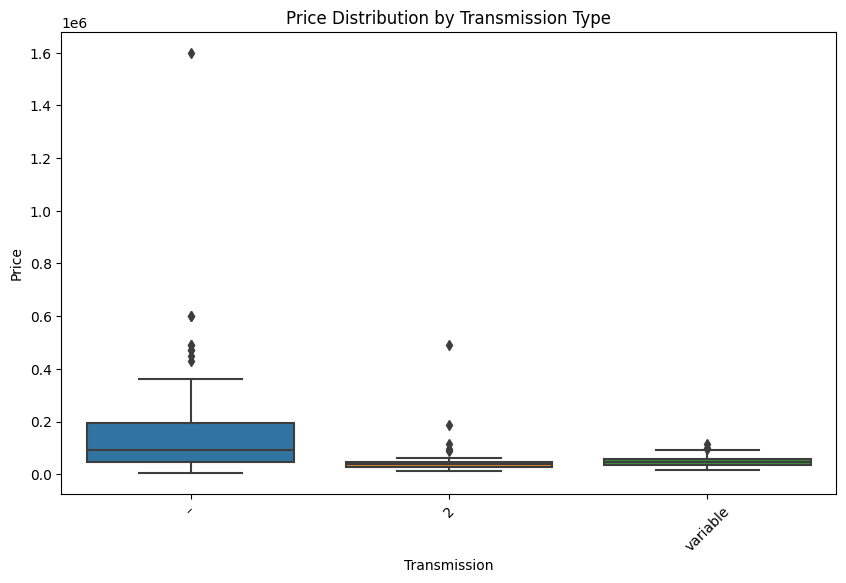

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col

filtered_df = df.filter(col("transmission").isin("–", "2", "variable"))
pandas_df = filtered_df.select("transmission", "price").toPandas()

plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=pandas_df)
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


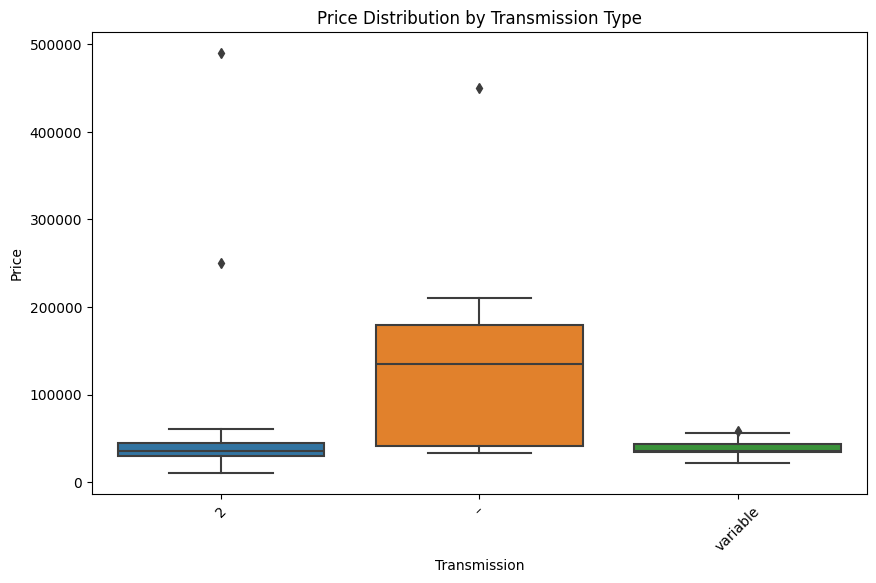

In [53]:
filtered_df = test_df.filter(col("transmission").isin("–", "2", "variable"))
pandas_df = filtered_df.select("transmission", "price").toPandas()

plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=pandas_df)
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
filtered_df = df.filter(col("transmission").isin("–", "2", "variable"))
pandas_filtered_df = filtered_df.select("transmission", "price").toPandas()

model = ols('price ~ transmission', data=pandas_filtered_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                    sum_sq     df          F        PR(>F)
transmission  6.064746e+11    2.0  15.216118  7.196909e-07
Residual      3.906023e+12  196.0        NaN           NaN


It could be better to treat these features separately rather than grouping them into an unknown category.

The ANOVA test shows that the transmission feature has a statistically significant impact on price since the p-value is 
well below the standard threshold of 0.05. This means that "–", "2", and "variable" do contribute to differences in the 
price, and grouping them as "unknown" could result in information loss.

In [26]:
df = df.withColumn(
    "transmission",
    when(col("transmission") == "–", "unknown-transmission")
    .otherwise(col("transmission"))
)

df.select('transmission').distinct().show()

+--------------------+
|        transmission|
+--------------------+
|6-speed electroni...|
|6 speed automatic...|
|   5-speed automatic|
|7-speed automatic...|
|            variable|
|  10-speed automatic|
|   2-speed automatic|
|           automatic|
|             7-speed|
|10-speed automati...|
|      7-speed manual|
|single-speed fixe...|
|   6-speed automatic|
|transmission over...|
|9-speed automatic...|
|   8-speed automatic|
|              manual|
|      5-speed manual|
|      6 speed manual|
|      8-speed manual|
+--------------------+
only showing top 20 rows



In [54]:
test_df = test_df.withColumn(
    "transmission",
    when(col("transmission") == "–", "unknown-transmission")
    .otherwise(col("transmission"))
)

test_df.select('transmission').distinct().show()

+--------------------+
|        transmission|
+--------------------+
|6-speed electroni...|
|   5-speed automatic|
|7-speed automatic...|
|            variable|
|  10-speed automatic|
|   2-speed automatic|
|           automatic|
|10-speed automati...|
|      7-speed manual|
|single-speed fixe...|
|   6-speed automatic|
|transmission over...|
|   8-speed automatic|
|              manual|
|      5-speed manual|
|      6 speed manual|
|      8-speed manual|
|   4-speed automatic|
|   7-speed automatic|
|dual clutch autom...|
+--------------------+
only showing top 20 rows



In [27]:
df = df.withColumn(
    "transmission",
    when(col("transmission").isin("unknown-transmission", "2","variable"), "unknown")  
    .otherwise(col("transmission"))
)


In [55]:
test_df = test_df.withColumn(
    "transmission",
    when(col("transmission").isin("unknown-transmission", "2","variable"), "unknown")  
    .otherwise(col("transmission"))
)


In [28]:
df.select('transmission').distinct().show()

+--------------------+
|        transmission|
+--------------------+
|6-speed electroni...|
|6 speed automatic...|
|   5-speed automatic|
|7-speed automatic...|
|  10-speed automatic|
|             unknown|
|   2-speed automatic|
|           automatic|
|             7-speed|
|10-speed automati...|
|      7-speed manual|
|single-speed fixe...|
|   6-speed automatic|
|transmission over...|
|9-speed automatic...|
|   8-speed automatic|
|              manual|
|      5-speed manual|
|      6 speed manual|
|      8-speed manual|
+--------------------+
only showing top 20 rows



In [29]:
df.show()

+--------------------+--------------------+---+-------------+----------+------+-------------+--------------------+--------------------+-------+--------------------+-----------+-----+
|               model|              engine| id|        brand|model_year|milage|    fuel_type|        transmission|             ext_col|int_col|            accident|clean_title|price|
+--------------------+--------------------+---+-------------+----------+------+-------------+--------------------+--------------------+-------+--------------------+-----------+-----+
|       Cooper S Base|1720HP 16L 4 Cyli...|  0|         MINI|      2007|213000|     Gasoline|           automatic|              Yellow|   Gray|       None reported|        Yes| 4200|
|               LS V8|2520HP 39L 8 Cyli...|  1|      Lincoln|      2002|143250|     Gasoline|           automatic|              Silver|  Beige|At least 1 accide...|        Yes| 4999|
|    G90 5.0 Ultimate|4200HP 50L 8 Cyli...|  3|      Genesis|      2017| 19500|     G

In [30]:
df.groupBy("transmission").agg(F.count("*").alias("count")).orderBy("count", ascending=False).show(truncate=False)

+----------------------------------+-----+
|transmission                      |count|
+----------------------------------+-----+
|automatic                         |48551|
|8-speed automatic                 |23248|
|6-speed automatic                 |16710|
|transmission w/dual shift mode    |15365|
|6-speed manual                    |9860 |
|7-speed automatic                 |9033 |
|10-speed automatic                |8967 |
|9-speed automatic                 |5005 |
|5-speed automatic                 |2690 |
|continuously variable transmission|2261 |
|4-speed automatic                 |2112 |
|5-speed manual                    |1916 |
|1-speed automatic                 |1800 |
|7-speed automatic with auto-shift |962  |
|manual                            |960  |
|8-speed automatic with auto-shift |445  |
|7-speed manual                    |404  |
|unknown                           |199  |
|transmission overdrive switch     |128  |
|6-speed automatic with auto-shift |91   |
+----------

In [31]:
df.groupBy('transmission').agg(count('transmission').alias('count')).orderBy('count').show()

+--------------------+-----+
|        transmission|count|
+--------------------+-----+
|dual clutch autom...|   14|
|6 speed automatic...|   16|
|6-speed electroni...|   22|
|             7-speed|   23|
|      8-speed manual|   23|
|             6-speed|   23|
|9-speed automatic...|   26|
|      6 speed manual|   28|
|10-speed automati...|   33|
|   2-speed automatic|   76|
|single-speed fixe...|   77|
|6-speed automatic...|   91|
|transmission over...|  128|
|             unknown|  199|
|      7-speed manual|  404|
|8-speed automatic...|  445|
|              manual|  960|
|7-speed automatic...|  962|
|   1-speed automatic| 1800|
|      5-speed manual| 1916|
+--------------------+-----+
only showing top 20 rows



In [32]:
df.select('accident').distinct().show()

+--------------------+
|            accident|
+--------------------+
|At least 1 accide...|
|       None reported|
|                NULL|
+--------------------+



In [33]:
null_count = df.filter(col("accident").isNull()).count()
print(f"Number of null rows in 'accident' column: {null_count}")

Number of null rows in 'accident' column: 1966


In [34]:
# df = df.fillna({"accident": "unknown_accident"})
# null_count = df.filter(col("accident").isNull()).count()
# print(f"Number of null rows in 'accident' column: {null_count}")


In [35]:
df = df.withColumn(
    "accident",
    when(col("accident") == "At least 1 accident or damage reported", "damage reported")
    .otherwise(col("accident"))
)
df.select('accident').distinct().show()

+---------------+
|       accident|
+---------------+
|  None reported|
|damage reported|
|           NULL|
+---------------+



In [56]:
test_df = test_df.withColumn(
    "accident",
    when(col("accident") == "At least 1 accident or damage reported", "damage reported")
    .otherwise(col("accident"))
)
test_df.select('accident').distinct().show()

+---------------+
|       accident|
+---------------+
|  None reported|
|damage reported|
|           NULL|
+---------------+



In [36]:
null_count = df.filter(col("fuel_type").isNull()).count()
print(f"Number of null rows in 'fuel_type' column: {null_count}")

Number of null rows in 'fuel_type' column: 4127


In [37]:
# df = df.fillna({"fuel_type": "unknown_fuel"})
# null_count = df.filter(col("fuel_type").isNull()).count()
# print(f"Number of null rows in 'fuel_type' column: {null_count}")


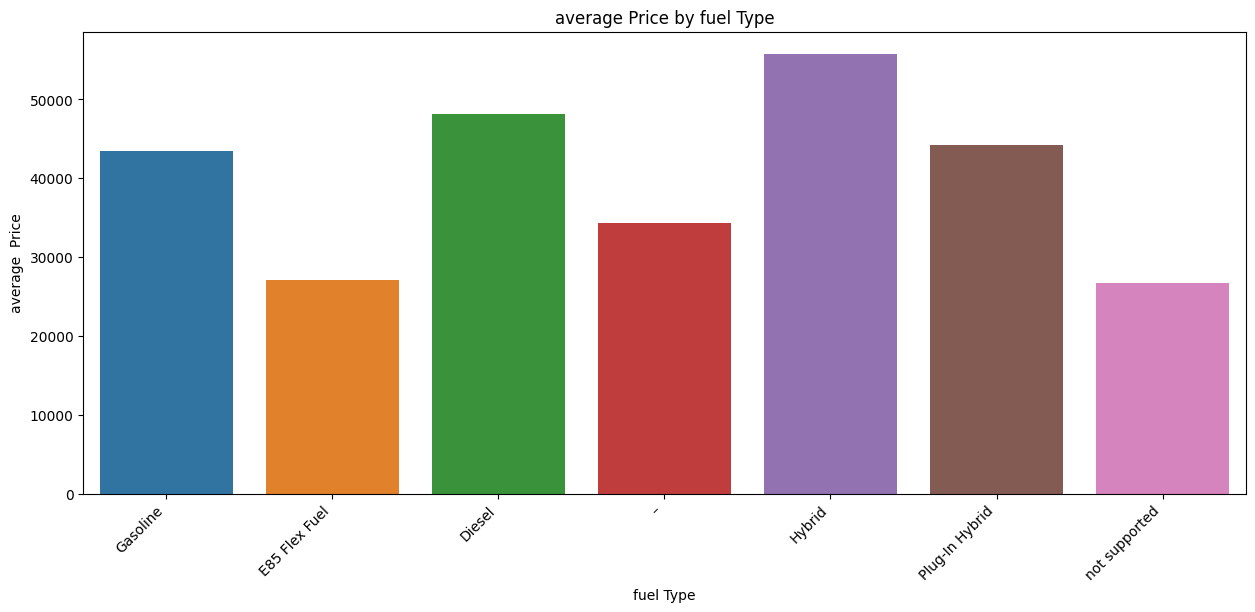

In [38]:
avg_price_df = df.groupBy('fuel_type').agg(F.mean('price').alias('avg_price'))
avg_price_pdf = avg_price_df.toPandas()

plt.figure(figsize=(15, 6)) 
sns.barplot(x='fuel_type', y='avg_price', data=avg_price_pdf)

plt.xlabel('fuel Type')
plt.ylabel('average  Price')
plt.title('average Price by fuel Type')
plt.xticks(rotation=45, ha='right')  

plt.show()

In [39]:
df.select('fuel_type').distinct().show()

+--------------+
|     fuel_type|
+--------------+
|      Gasoline|
| E85 Flex Fuel|
|        Diesel|
|             –|
|        Hybrid|
|Plug-In Hybrid|
| not supported|
|          NULL|
+--------------+



In [40]:
df = df.withColumn(
    "fuel_type",
    when(col("fuel_type") == "–", "unknown-name-fuel")
    .otherwise(col("fuel_type"))
)
df.select('fuel_type').distinct().show()

+-----------------+
|        fuel_type|
+-----------------+
|         Gasoline|
|    E85 Flex Fuel|
|           Diesel|
|           Hybrid|
|   Plug-In Hybrid|
|unknown-name-fuel|
|    not supported|
|             NULL|
+-----------------+



In [57]:
test_df = test_df.withColumn(
    "fuel_type",
    when(col("fuel_type") == "–", "unknown-name-fuel")
    .otherwise(col("fuel_type"))
)
test_df.select('fuel_type').distinct().show()

+-----------------+
|        fuel_type|
+-----------------+
|         Gasoline|
|    E85 Flex Fuel|
|           Diesel|
|           Hybrid|
|   Plug-In Hybrid|
|unknown-name-fuel|
|    not supported|
|             NULL|
+-----------------+



In [41]:
df.select('clean_title').distinct().show()

+-----------+
|clean_title|
+-----------+
|        Yes|
|       NULL|
+-----------+



In [42]:
df.filter(col('clean_title').isNull()).count()

17290

In [43]:
# df = df.fillna({"clean_title": "unknown_title"})
# null_count = df.filter(col("clean_title").isNull()).count()
# print(f"Number of null rows in 'clean_title' column: {null_count}")

In [44]:
def remove_outliers_iqr(df, column):

    Q1 = df.approxQuantile(column, [0.25], 0.01)[0]
    Q3 = df.approxQuantile(column, [0.75], 0.01)[0]
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df_out = df.filter((F.col(column) >= lower_bound) & (F.col(column) <= upper_bound))
    return df_out

df_train_no_outliers = remove_outliers_iqr(df, 'milage')
df_train_no_outliers = remove_outliers_iqr(df_train_no_outliers, 'price')

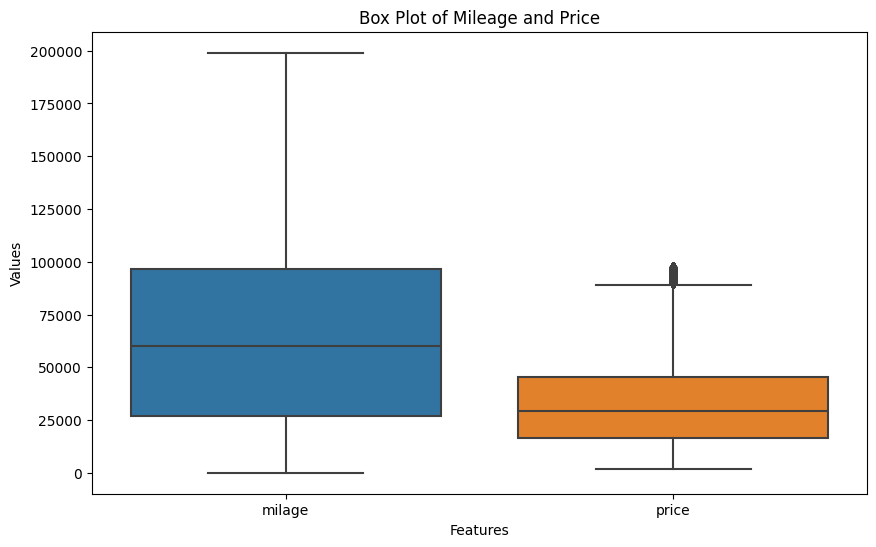

In [45]:
pandas_df = df_train_no_outliers.toPandas()

plt.figure(figsize=(10, 6))
sns.boxplot(data=pandas_df[['milage', 'price']])
plt.title('Box Plot of Mileage and Price')
plt.xlabel('Features')
plt.ylabel('Values')

plt.show()

In [46]:
df_train_no_outliers.show()

+--------------------+--------------------+---+-------------+----------+------+-------------+--------------------+--------------------+-------+---------------+-----------+-----+
|               model|              engine| id|        brand|model_year|milage|    fuel_type|        transmission|             ext_col|int_col|       accident|clean_title|price|
+--------------------+--------------------+---+-------------+----------+------+-------------+--------------------+--------------------+-------+---------------+-----------+-----+
|               LS V8|2520HP 39L 8 Cyli...|  1|      Lincoln|      2002|143250|     Gasoline|           automatic|              Silver|  Beige|damage reported|        Yes| 4999|
|    G90 5.0 Ultimate|4200HP 50L 8 Cyli...|  3|      Genesis|      2017| 19500|     Gasoline|transmission w/du...|               Black|  Black|  None reported|        Yes|45000|
|         Metris Base|2080HP 20L 4 Cyli...|  4|Mercedes-Benz|      2021|  7388|     Gasoline|   7-speed automa

In [47]:
output_path = "../data/cleaned_train"
df_train_no_outliers.write.csv(output_path, header=True, mode='overwrite')


In [58]:
output_path = "../data/cleaned_test"
test_df.write.csv(output_path, header=True, mode='overwrite')
